## LearnR

Note that metapath names with `<` are [currently truncated](https://github.com/IRkernel/IRkernel/issues/286) in the notebook, unless they are specially HTML escaped.

In [1]:
library(magrittr)

## Read datasets

In [2]:
auroc_df = readr::read_tsv('data/auroc.tsv')
degrees = dplyr::filter(auroc_df, feature_type == 'degree')$feature
metapaths = dplyr::filter(auroc_df, feature_type == 'dwpc')$feature

# col_types not needed here, but used for safety
col_types = list()
for (metapath in metapaths) {
  col_types[[metapath]] = readr::col_number()
}
for (degree in degrees) {
  col_types[[degree]] = readr::col_integer()
}

feature_df = readr::read_tsv('data/matrix/rephetio-v2.0/features.tsv.bz2', col_types = col_types) %>%
  dplyr::mutate(prior_logit = boot::logit(prior_prob))

In [3]:
# Transform
for (degree in degrees) {
  x = feature_df[[degree]]
  feature_df[[degree]] = asinh(x)
}
for (metapath in metapaths) {
  x = feature_df[[metapath]]
  feature_df[[metapath]] = asinh(x / mean(x))
}

In [4]:
table(auroc_df$feature_type)


degree   dwpc  prior 
    16   1196      1 

In [5]:
perm_affected = dplyr::filter(auroc_df, feature_type == 'dwpc' & fdr_pval_auroc <= 0.01)$feature
length(perm_affected)

[1] 205

## Dataset preparation

In [6]:
head(feature_df, 2)

,compound_id,disease_id,status,disease_name,compound_name,prior_prob,CbG,CcSE,CdG,CiPC,ellip.h,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD,prior_logit
1,DB00014,DOID:0050741,0,alcohol dependence,Goserelin,0.0098008,1.443635,6.210604,0,0.8813736,⋯,0,0.01067385,0,0,0,0,0,0.1365873,0.1364012,-4.615442
2,DB00153,DOID:0050741,0,alcohol dependence,Ergocalciferol,0.0098008,2.644121,4.094622,0,0.8813736,⋯,0,0,0,0,0,0,0,0,0,-4.615442


In [7]:
features = auroc_df$feature
X_list = list()
X_list$all_features = X = feature_df %>%
  dplyr::select(prior_logit, one_of(degrees), one_of(metapaths)) %>%
  as.matrix()
X_list$perm_affected = feature_df %>%
  dplyr::select(prior_logit, one_of(degrees), one_of(perm_affected)) %>%
  as.matrix()
y = feature_df$status
sprintf("%s compound–disease pairs × %s features", nrow(X), ncol(X))

[1] "3775 compound–disease pairs × 1213 features"

## Prior probability performance baseline

In [8]:
hetior::calc_vtms(feature_df$status, feature_df$prior_prob, T)[c('auroc', 'auprc', 'tjur')]

$auroc
[1] 0.8480637

$auprc
[1] 0.596649

$tjur
[1] 0.08638926

## Parameter Sweep

In [9]:
n_runs = 50

In [10]:
results = list()
i = 1
for (feature_set in names(X_list)) {
  for (seed in 1:n_runs) {
    elem = list(seed = seed, feature_set = feature_set)
    X = X_list[[feature_set]]
    
    # Set penalty factor for prior to 0
    penalty_factor = as.numeric(colnames(X) != 'prior_logit')
    
    elem$fit = hetior::glmnet_train(X = X, y = y, alpha = 1, cores=12, seed=seed,
        penalty.factor=penalty_factor, lambda.min.ratio=1e-5, nlambda=200)
    elem$coef_df = elem$fit$coef_df %>%
      dplyr::filter(zcoef != 0) %>%
      dplyr::mutate(seed = seed, feature_set = feature_set)
    elem$pos_coefs = sum(elem$coef_df$zcoef > 0)
    elem$neg_coefs = sum(elem$coef_df$zcoef < 0)
    results[[i]] = elem
    i = i + 1
  }
}
length(results)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



[1] 100

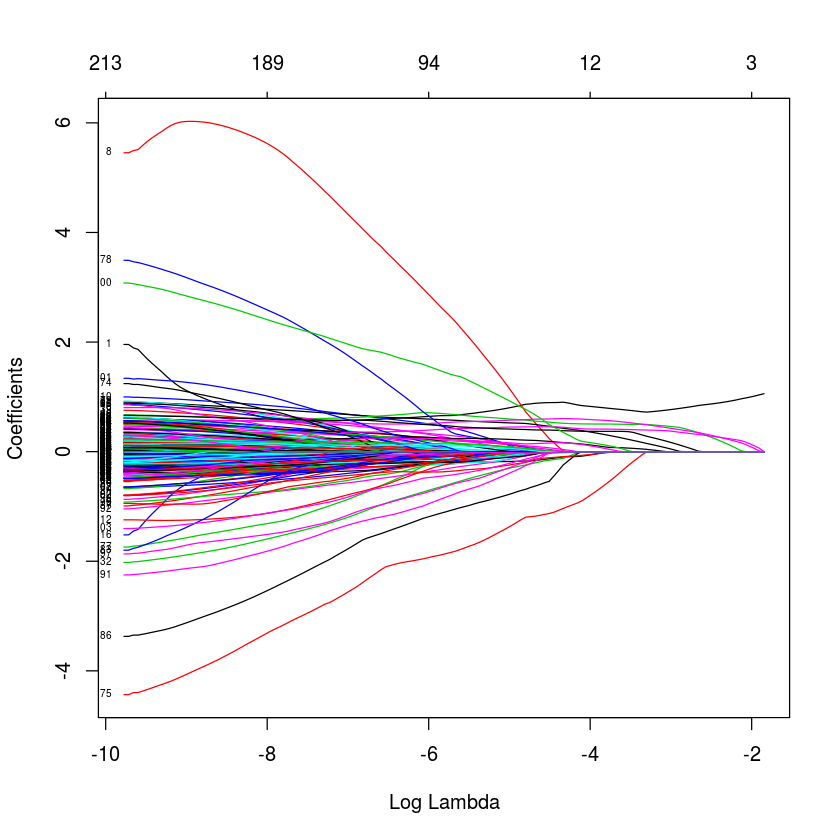

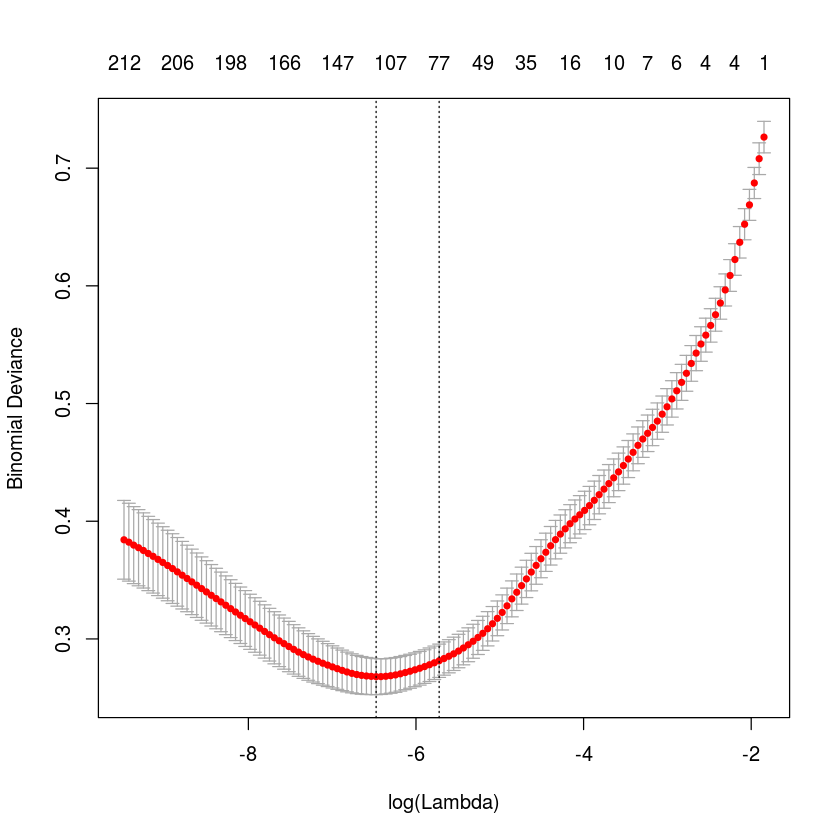

In [11]:
# Plot a single glmnet fit for diagnostics
plot(elem$fit$cv_model$glmnet.fit, xvar = "lambda", label = TRUE)
plot(elem$fit$cv_model)

## Summarize selection sweep

In [12]:
sweep_summary_df = do.call(rbind, lapply(results, function(x) {dplyr::data_frame(
    seed = x$seed,
    feature_set = x$feature_set,
    auroc = x$fit$vtm$auroc,
    auprc = x$fit$vtm$auprc,
    tjur = x$fit$vtm$tjur,
    pos_coefs = x$pos_coefs,
    neg_coefs = x$neg_coefs
)}))
sweep_summary_df

,seed,feature_set,auroc,auprc,tjur,pos_coefs,neg_coefs
1,1,all_features,0.992690671461778,0.973153527815705,0.785237011170338,79,58
2,2,all_features,0.991356958028153,0.969462240299796,0.773643170647872,69,53
3,3,all_features,0.993281873602032,0.97489395145825,0.790928368846372,80,62
4,4,all_features,0.992690671461778,0.973153527815705,0.785237011170338,79,58
5,5,all_features,0.992690671461778,0.973153527815705,0.785237011170338,79,58
6,6,all_features,0.992040261392041,0.971350339117318,0.779423566721238,74,58
7,7,all_features,0.992690671461778,0.973153527815705,0.785237011170338,79,58
8,8,all_features,0.993782290250426,0.976396247305641,0.796510674637868,84,66
9,9,all_features,0.989910968817153,0.965587181584148,0.762117485550469,61,44
10,10,all_features,0.994246743563879,0.977820579301757,0.801991585150646,90,67


In [13]:
sweep_summary_df %>%
  dplyr::group_by(feature_set) %>%
  dplyr::do(
    dplyr::bind_cols(
      ggplot2::mean_cl_normal(.$auroc) %>% dplyr::rename(auroc=y, auroc_lower=ymin, auroc_upper=ymax),
      ggplot2::mean_cl_normal(.$auprc) %>% dplyr::rename(auprc=y, auprc_lower=ymin, auprc_upper=ymax),
      ggplot2::mean_cl_normal(.$tjur) %>% dplyr::rename(tjur=y, tjur_lower=ymin, tjur_upper=ymax))
    )

,feature_set,auroc,auroc_lower,auroc_upper,auprc,auprc_lower,auprc_upper,tjur,tjur_lower,tjur_upper
1,all_features,0.9928028,0.992483,0.9931227,0.9735763,0.9726502,0.9745025,0.7871433,0.7839876,0.7902989
2,perm_affected,0.9855754,0.9853339,0.9858169,0.9527872,0.9521357,0.9534388,0.7448089,0.7425742,0.7470437


In [14]:
p_all_features = subset(sweep_summary_df, feature_set == 'all_features')$auroc
p_perm_affected = subset(sweep_summary_df, feature_set == 'perm_affected')$auroc
t.test(p_all_features, p_perm_affected)$p.value

[1] 6.249289e-56

In [15]:
sweep_coef_df = do.call(rbind, lapply(results, function(x) {x$coef_df}))
head(sweep_coef_df, 2)

,feature,coef,zcoef,seed,feature_set
1,prior_logit,0.9182269,3.520284,1,all_features
2,CbG,-0.01256616,-0.02866243,1,all_features


In [16]:
sweep_feature_df = sweep_coef_df %>%
  dplyr::group_by(feature, feature_set) %>%
  dplyr::summarize(
    selection_rate = n() / n_runs
  ) %>%
  dplyr::ungroup() %>%
  tidyr::spread(feature_set, selection_rate, fill=0) %>%
  dplyr::arrange(desc(all_features)) %>%
  dplyr::left_join(auroc_df)
head(sweep_feature_df, 2)

Joining by: "feature"


,feature,all_features,perm_affected,feature_type,nonzero,auroc,auroc_permuted,delta_auroc,pval_auroc,fdr_pval_auroc
1,CbGaD,1,1,dwpc,0.31444,0.71627,0.57794,0.13832,2.9404e-06,0.00025476
2,CbGaDuGaD,1,0,dwpc,0.90993,0.65517,0.6332,0.021965,0.01508,0.044028


In [17]:
# Unique features
nrow(sweep_feature_df)

[1] 227

In [18]:
sweep_feature_df %>% readr::write_tsv('selection/sweep-features.tsv')
sweep_coef_df %>% readr::write_tsv('selection/sweep-coefficients.tsv')
sweep_summary_df %>% readr::write_tsv('selection/sweep-model-summaries.tsv')